In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 92kB 18.2MB/s eta 0:00:01
Libraries imported.


# Capstone Project

#### Applied Data Science Capstone by IBM/Coursera

# Location for a burger joint

## 1. Introduction/Business Problem

Find a good location to start a business is a challenge problem. 
A young man wants start his first business. He makes very tasty hamburgers and decided to open a burger joint. He lives between two universities and thinks that locations where there are many students are good to sell hamburgers because students like it. He wants to know what is the best location to open his business, that is, near what university and in what region near the university.

In this project we will help this young choose a location to sell hamburgers in Campinas, State of São Paulo, Brazil. We will take into the number of burger joints that already exist in the neighborhood of universities, if necessary we will include other categories of restaurants to improve our analysis. We will use Foursquare api to find them.

We will make Exploratory Data Analysis and use a clustering algorithm to  detect locations that are not already crowded with burger joints and 
we will choose a locations as close to university as possible.

## 2. Data

To solve our problem we need:

- University locations;

- Burger joint and others restaurants locations. 


The university name's were provided by young that will start the business. And we use Google maps to get the address.

### 2.1 University Locations

#### 2.1.1 Address

##### 2.1.1.1 UNICAMP

**Name:** Universidade Estadual de Campinas

**Address:** Cidade Universitária Zeferino Vaz - Barão Geraldo, Campinas - SP, 13083-970

**Site:** https://www.unicamp.br/unicamp/mapas


##### 2.1.1.2 MACKENZIE

**Name:** Universidade Presbiteriana Mackenzie, Campus Campinas

**Address:** Av. Brasil, 1220 - Jardim Guanabara, Campinas - SP, 13073-148

**Site:** https://www.mackenzie.br/universidade/campinas/

#### 2.1.2 Google Maps url

We use the Google Maps url to take latitude and longitude values of Universities. The latitude and longitude are at the end of url.

##### 2.1.2.1 Google Maps - UNICAMP

https://www.google.com.br/maps/place/UNICAMP+Universidade+Estadual+de+Campinas/@-22.8176241,-47.0681567,15z/data=!4m5!3m4!1s0x94c8c6b005d24db5:0xc6db750ecf04d796!8m2!3d-22.8184393!4d-47.0647206?hl=pt-BR



In [2]:
latitude_u, longitude_u =[-22.8184393,-47.0647206]

##### 2.1.2.2 Google Maps - Mackenzie

https://www.google.com.br/maps/place/Av.+Brasil,+1220+-+Jardim+Guanabara,+Campinas+-+SP,+13073-148/@-22.8854167,-47.0706735,17z/data=!3m1!4b1!4m5!3m4!1s0x94c8c61ad1cc9435:0x94dba75d07160912!8m2!3d-22.8854217!4d-47.0684848?hl=pt-BR


In [3]:
latitude_m, longitude_m = [-22.8854217,-47.0684848]

#### 2.1.3 City of Campinas with the two universities

Using geopy to get Campinas' geographical coordinates

In [4]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("Campinas - SP")
print(location.address)
latitude = location.latitude
longitude = location.longitude
print('latitude: {}, longitude: {}'.format(latitude,longitude))

Campinas, Região Imediata de Campinas, Região Metropolitana de Campinas, Região Intermediária de Campinas, São Paulo, Região Sudeste, Brasil
latitude: -22.90556, longitude: -47.06083


In [5]:
# create map of Campinas using latitude and longitude values
map_campinas = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map

# Unicamp
folium.Marker(
    location=[latitude_u, longitude_u],
    popup='Unicamp',
    icon=folium.Icon(color='red')
).add_to(map_campinas)

# Mackenzie
folium.Marker(
    location=[latitude_m, longitude_m],
    popup='Mackenzie',
    icon=folium.Icon(color='green')
).add_to(map_campinas)

map_campinas

In [6]:
map_campinas.save('map_campinas.html')

### 2.2 Restaurant locations

Next, we are going to start utilizing the Foursquare API to get the burger joint locations. 



#### 2.2.1 Define Foursquare Credentials and Version

In [7]:
# The code was removed by Watson Studio for sharing.

In [8]:
# The content of above cell
# CLIENT_ID = 'XXXXXXX' # your Foursquare ID
# CLIENT_SECRET = 'XXXXXXXXXXX' # your Foursquare Client Secret
# VERSION = '20180605' # Foursquare API version

#### 2.2.2 Search for burger near universities

##### 2.2.2.1 Unicamp

In [9]:
# Unicamp
search_query = 'burger'
radius = 1000
LIMIT = 50
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_u, longitude_u, VERSION, search_query, radius, LIMIT)



In [10]:
results = requests.get(url).json()

In [11]:
results

{'meta': {'code': 200, 'requestId': '5e9b6e4f7828ae001b1efbc1'},
 'response': {'venues': []}}

The search for burger returned zero results so we decided include other food categories (Burger Joint,
Bakery,
Fast Food Restaurant,
Food Stand,
Food Truck,
Hot Dog Joint,
Pastelaria,
Pizza Place,
Sandwich Place,
Snack Place). We take the categories from [Foursquare Documentation](https://developer.foursquare.com/docs/build-with-foursquare/categories/).

In [12]:
## The categories included and their ids are:

#Burger Joint  
'4bf58dd8d48988d16c941735',
# Bakery
'4bf58dd8d48988d16a941735',
# Fast Food Restaurant
'4bf58dd8d48988d16e941735',
# Food Stand
'56aa371be4b08b9a8d57350b',
# Food Truck
'4bf58dd8d48988d1cb941735',
# Hot Dog Joint
'4bf58dd8d48988d16f941735',
# Pastelaria
'5294cbda3cf9994f4e043a63',
# Pizza Place
'4bf58dd8d48988d1ca941735',
# Sandwich Place
'4bf58dd8d48988d1c5941735',
# Snack Place
'4bf58dd8d48988d1c7941735'

'4bf58dd8d48988d1c7941735'

#### 2.2.3 Search for restaurants

In [13]:
# A comma separated list of categories
cat_ids = '4bf58dd8d48988d16c941735,4bf58dd8d48988d16a941735,4bf58dd8d48988d16e941735,56aa371be4b08b9a8d57350b,4bf58dd8d48988d1cb941735,4bf58dd8d48988d16f941735,5294cbda3cf9994f4e043a63,4bf58dd8d48988d1ca941735,4bf58dd8d48988d1c5941735,4bf58dd8d48988d1c7941735'


In [14]:
# search parameters
CATEGORYID = cat_ids
radius = 1000
LIMIT = 50

##### 2.2.3.1 Unicamp

In [15]:
# unicamp
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_u, longitude_u, VERSION, CATEGORYID, radius, LIMIT)


In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9b6eb047b43d0023e4280d'},
 'response': {'venues': [{'id': '53106897498e0a8b5508fcc6',
    'name': 'Cantina da FEC',
    'location': {'lat': -22.816377430666996,
     'lng': -47.062061677426634,
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.816377430666996,
       'lng': -47.062061677426634}],
     'distance': 356,
     'cc': 'BR',
     'country': 'Brasil',
     'formattedAddress': ['Brasil']},
    'categories': [{'id': '4bf58dd8d48988d1c7941735',
      'name': 'Snack Place',
      'pluralName': 'Snack Places',
      'shortName': 'Snacks',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/snacks_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1587244689',
    'hasPerk': False},
   {'id': '5068d796e4b02e9a846e8a83',
    'name': 'Pizzaria Piramide',
    'location': {'lat': -22.82454092929293,
     'lng': -47.0722022020202,
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.82

In [17]:
venues = results['response']['venues']

nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues.columns

Index(['categories', 'hasPerk', 'id', 'location.address', 'location.cc',
       'location.city', 'location.country', 'location.crossStreet',
       'location.distance', 'location.formattedAddress',
       'location.labeledLatLngs', 'location.lat', 'location.lng',
       'location.neighborhood', 'location.postalCode', 'location.state',
       'name', 'referralId'],
      dtype='object')

In [18]:
# filter columns
filtered_columns = ['name', 'categories', 'location.lat',
       'location.lng', 'location.distance']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,name,categories,location.lat,location.lng,location.distance
0,Cantina da FEC,"[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",-22.816377,-47.062062,356
1,Pizzaria Piramide,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",-22.824541,-47.072202,1025
2,Delão Lanches,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",-22.815784,-47.073780,975
3,Lanchonete do IEL,"[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",-22.815227,-47.070109,658
4,Espetos do Japa,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",-22.822791,-47.070209,742


We need to extract category from category column. Lets take a look at first cell

In [19]:
nearby_venues.categories[0]

[{'id': '4bf58dd8d48988d1c7941735',
  'name': 'Snack Place',
  'pluralName': 'Snack Places',
  'shortName': 'Snacks',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/snacks_',
   'suffix': '.png'},
  'primary': True}]

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
# filter the category for each row
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng,distance
0,Cantina da FEC,Snack Place,-22.816377,-47.062062,356
1,Pizzaria Piramide,Pizza Place,-22.824541,-47.072202,1025
2,Delão Lanches,Food Truck,-22.815784,-47.073780,975
3,Lanchonete do IEL,Snack Place,-22.815227,-47.070109,658
4,Espetos do Japa,Food Truck,-22.822791,-47.070209,742


In [22]:
venues_unicamp = nearby_venues.copy()
print("Number of restaurants in Unicamp's neighborhood:{}".format(len(venues_unicamp)))

Number of restaurants in Unicamp's neighborhood:27


In [23]:
venues_unicamp

,name,categories,lat,lng,distance
0,Cantina da FEC,Snack Place,-22.816377,-47.062062,356
1,Pizzaria Piramide,Pizza Place,-22.824541,-47.072202,1025
2,Delão Lanches,Food Truck,-22.815784,-47.073780,975
3,Lanchonete do IEL,Snack Place,-22.815227,-47.070109,658
4,Espetos do Japa,Food Truck,-22.822791,-47.070209,742
5,Veg Wrap,Food Stand,-22.817171,-47.070477,607
6,King Stoned,Smoke Shop,-22.826250,-47.072360,1170
7,Natortilha,Taco Place,-22.812383,-47.058756,910
8,De la rua Mexican Burritos,Food Truck,-22.826448,-47.072785,1216
9,Quiosque Do Açaí,Snack Place,-22.820020,-47.071950,762


##### 2.2.3.2 Mackenzie

In [24]:
# mackenzie
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_m, longitude_m, VERSION, CATEGORYID, radius, LIMIT)

In [25]:
results = requests.get(url).json()

venues = results['response']['venues']

nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['name', 'categories', 'location.lat',
       'location.lng', 'location.distance']
nearby_venues =nearby_venues.loc[:, filtered_columns]

In [26]:
# filter the category for each row
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng,distance
0,Panificadora Crisabel,Bakery,-22.883295,-47.068249,237
1,Mamelly,Snack Place,-22.885802,-47.067471,112
2,Todo Sabor - Café & Cia,Snack Place,-22.882803,-47.068577,291
3,Delícias do Açai,Snack Place,-22.886353,-47.068441,103
4,Doguerria,Hot Dog Joint,-22.885876,-47.069122,82


In [27]:
venues_mackenzie = nearby_venues.copy()
print("Number of restaurants in Mackenzie's neighborhood:{}".format(len(venues_mackenzie)))

Number of restaurants in Mackenzie's neighborhood:49


In [28]:
venues_mackenzie

,name,categories,lat,lng,distance
0,Panificadora Crisabel,Bakery,-22.883295,-47.068249,237
1,Mamelly,Snack Place,-22.885802,-47.067471,112
2,Todo Sabor - Café & Cia,Snack Place,-22.882803,-47.068577,291
3,Delícias do Açai,Snack Place,-22.886353,-47.068441,103
4,Doguerria,Hot Dog Joint,-22.885876,-47.069122,82
5,Pizzaria Nonna Cecília,Pizza Place,-22.882965,-47.068306,274
6,mega pizza,Pizza Place,-22.883836,-47.065429,359
7,We Can Veg It,Food Truck,-22.890164,-47.067267,542
8,Padaria Dolce Momento,Bakery,-22.887929,-47.063098,618
9,Levain De Casa,Bakery,-22.884678,-47.059505,924


#### 2.2.4 Maps: Universities and restaurants

<a name="unicamp"></a>

In [29]:
map_unicamp = folium.Map(location=[latitude_u,longitude_u], zoom_start=15)
folium.Marker([latitude_u,longitude_u], popup='Unicamp').add_to(map_unicamp)
for lat, lon in zip(venues_unicamp['lat'],venues_unicamp['lng']):
    folium.CircleMarker([lat, lon], radius=3, fill=True, fill_opacity=1).add_to(map_unicamp)
map_unicamp

In [30]:
map_mackenzie = folium.Map(location=[latitude_m,longitude_m], zoom_start=15)
folium.Marker([latitude_m,longitude_m], popup='Mackenzie').add_to(map_mackenzie)
for lat, lon in zip(venues_mackenzie['lat'],venues_mackenzie['lng']):
    folium.CircleMarker([lat, lon], radius=3, fill=True, fill_opacity=1).add_to(map_mackenzie)
map_mackenzie

#### 2.3 Final Data

In this section we get the location of two universities and locations of some categories of restaurants in their neighboorhood. Our firs attempt was search for 'burger' but the request in Unicamp's neighborhood return 0 venues. So we decided include other categories we think students like to. Now we have two dataframes, one to each university. Each row of dataframes contains: name of restaurant,	category(Burger Joint,
Bakery,
Fast Food Restaurant,
Food Stand,
Food Truck,
Hot Dog Joint,
Pastelaria,
Pizza Place,
Sandwich Place,
Snack Place), geographical coordinates and	distance to university.

### 3. Methodology

In this project we are helping a young man to choose a location start his first business, a burger joint. We will to decide between neighborhoods of two universities given by the young.

In the previous section we have collected the data. For each university and for each restaurant in seleced categories (Burger Joint, Bakery, Fast Food Restaurant, Food Stand, Food Truck, Hot Dog Joint, Pastelaria, Pizza Place, Sandwich Place, Snack Place) we have **name**, **category**, **latitude**, **longitude** and **distance** to university.
We use a radius of 1000 m in our foursquare api requests, so our analysis take acount restaurants in a circle of radius ~1Km.

In this section we do an exploratory data analysis and after use a clustering algorithm to see how the restaurantes are grouped around universities.


#### 3.1 Exploratory data analysis

Questions:

- Number of restaurants in each neighborhood

- Number of burger joints in each neighborhood

- Percentage of burger joints

- Number of restaurants by category

- Density of restaurants in each neighborhood

- Mean distance to university

- Histogram of distances to university

- Heatmap

**Number of restaurants in each neighborhood**

In [31]:
n_unicamp = len(venues_unicamp)
n_mackenzie = len(venues_mackenzie)
print("Restaurants in Unicamp's neighborhood: {}".format(n_unicamp))
print("Restaurants in Mackenzie's neighborhood {}".format(n_mackenzie))

Restaurants in Unicamp's neighborhood: 27
Restaurants in Mackenzie's neighborhood 49


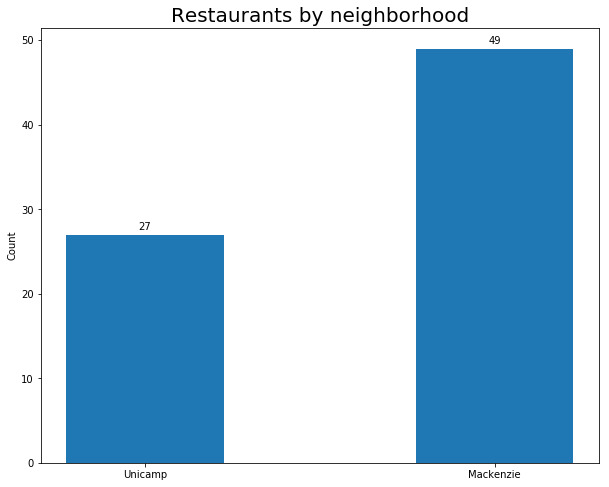

In [32]:
labels = ['Unicamp', 'Mackenzie']
count = [n_unicamp, n_mackenzie]

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x, count, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Restaurants by neighborhood', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


plt.show()


There are more restaurants near Mackenzie than near Unicamp

**Number of restaurants by category**

Text(0.5, 1.0, 'Restaurants by category - Unicamp')

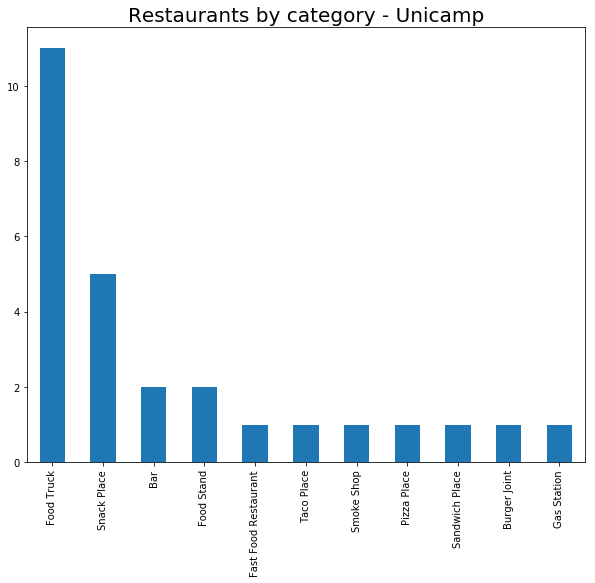

In [33]:
plt.figure(figsize=(10,8))
venues_unicamp['categories'].value_counts().plot(kind='bar')
plt.title('Restaurants by category - Unicamp', fontsize=20)

Text(0.5, 1.0, 'Restaurants by category - Mackenzie')

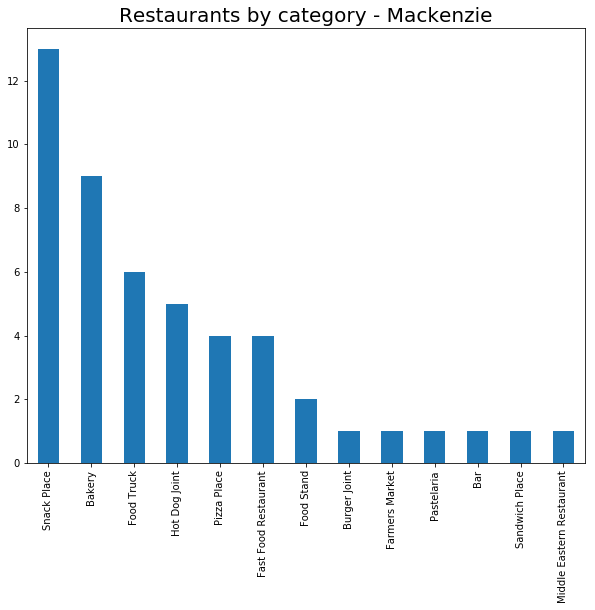

In [34]:
plt.figure(figsize=(10,8))
venues_mackenzie['categories'].value_counts().plot(kind='bar')
plt.title('Restaurants by category - Mackenzie', fontsize=20)

In booth neighborhoods the most popular category is Food Truck. 

**Number of burger joints in each neighborhood**

In [35]:
venues_unicamp[venues_unicamp.categories == 'Burger Joint']

,name,categories,lat,lng,distance
13,Redi Lanches,Burger Joint,-22.824901,-47.0673,766


In [36]:
bj_unicamp = len(venues_unicamp[venues_unicamp.categories == 'Burger Joint'])

In [37]:
venues_mackenzie[venues_mackenzie.categories == 'Burger Joint']

,name,categories,lat,lng,distance
39,Big Jack Hamburgueria,Burger Joint,-22.889849,-47.076352,945


In [38]:
bj_mackenzie = len(venues_mackenzie[venues_mackenzie.categories == 'Burger Joint'])

In [39]:
print("Burger joints in Unicamp's neighborhood: {}".format(bj_unicamp))
print("Burger joints in Mackenzie's neighborhood {}".format(bj_mackenzie))

Burger joints in Unicamp's neighborhood: 1
Burger joints in Mackenzie's neighborhood 1


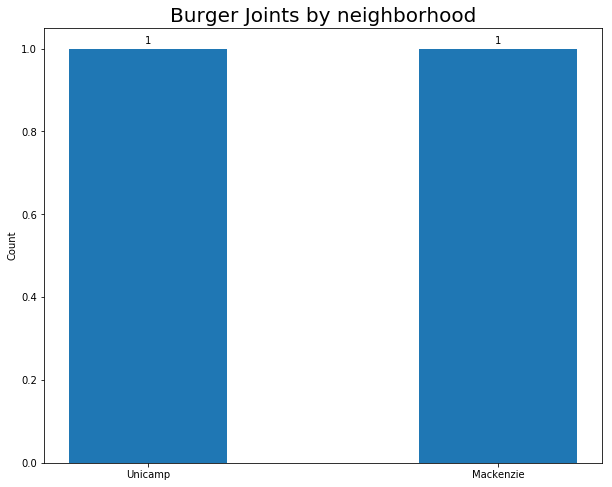

In [40]:
labels = ['Unicamp', 'Mackenzie']
count = [bj_unicamp, bj_mackenzie]

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x, count, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Burger Joints by neighborhood', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


plt.show()


The number of burger joints is small for both neighboorhoods. Near Unicamp there is only one.

**Percentage of burger joints**

In [41]:
print('Unicamp: {:.2f} %'.format(100*bj_unicamp/n_unicamp))
print('Mackenzie: {:.2f} %'.format(100*bj_mackenzie/n_mackenzie))

Unicamp: 3.70 %
Mackenzie: 2.04 %


*pie plot*

* Unicamp

In [42]:
# auxiliary function

def is_bj(category):
    ''' Category is Burger Joint?'''
    if category == 'Burger Joint':
        return category
    else:
        return 'Other categories'

In [43]:
temp_df = venues_unicamp.copy()

# new_column: Is Burger join?

temp_df['Is burger joint?'] = temp_df['categories'].apply(is_bj)
temp_df.head(10)

,name,categories,lat,lng,distance,Is burger joint?
0,Cantina da FEC,Snack Place,-22.816377,-47.062062,356,Other categories
1,Pizzaria Piramide,Pizza Place,-22.824541,-47.072202,1025,Other categories
2,Delão Lanches,Food Truck,-22.815784,-47.073780,975,Other categories
3,Lanchonete do IEL,Snack Place,-22.815227,-47.070109,658,Other categories
4,Espetos do Japa,Food Truck,-22.822791,-47.070209,742,Other categories
5,Veg Wrap,Food Stand,-22.817171,-47.070477,607,Other categories
6,King Stoned,Smoke Shop,-22.826250,-47.072360,1170,Other categories
7,Natortilha,Taco Place,-22.812383,-47.058756,910,Other categories
8,De la rua Mexican Burritos,Food Truck,-22.826448,-47.072785,1216,Other categories
9,Quiosque Do Açaí,Snack Place,-22.820020,-47.071950,762,Other categories


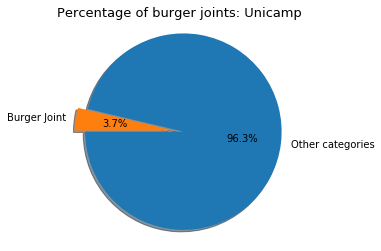

In [44]:
pie_data = pd.DataFrame(temp_df['Is burger joint?'].value_counts())

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = pie_data.index
sizes = pie_data['Is burger joint?']
explode = (0, 0.1,)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of burger joints: Unicamp', fontsize = 13)

plt.show()

*pie plot*

* Mackenzie

In [45]:
temp_df = venues_mackenzie.copy()

# new_column: Is Burger join?

temp_df['Is burger joint?'] = temp_df['categories'].apply(is_bj)
temp_df.head(10)

,name,categories,lat,lng,distance,Is burger joint?
0,Panificadora Crisabel,Bakery,-22.883295,-47.068249,237,Other categories
1,Mamelly,Snack Place,-22.885802,-47.067471,112,Other categories
2,Todo Sabor - Café & Cia,Snack Place,-22.882803,-47.068577,291,Other categories
3,Delícias do Açai,Snack Place,-22.886353,-47.068441,103,Other categories
4,Doguerria,Hot Dog Joint,-22.885876,-47.069122,82,Other categories
5,Pizzaria Nonna Cecília,Pizza Place,-22.882965,-47.068306,274,Other categories
6,mega pizza,Pizza Place,-22.883836,-47.065429,359,Other categories
7,We Can Veg It,Food Truck,-22.890164,-47.067267,542,Other categories
8,Padaria Dolce Momento,Bakery,-22.887929,-47.063098,618,Other categories
9,Levain De Casa,Bakery,-22.884678,-47.059505,924,Other categories


In [46]:
pie_data = pd.DataFrame(temp_df['Is burger joint?'].value_counts())

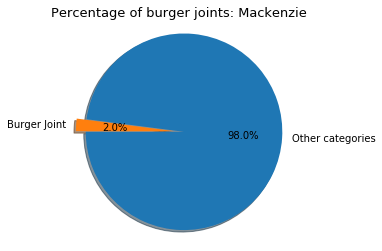

In [47]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = pie_data.index
sizes = pie_data['Is burger joint?']
explode = (0, 0.1,)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of burger joints: Mackenzie', fontsize = 13)

plt.show()

**Density of restaurants in each neighborhood**

Density (d) is the number of restaurants divided by area.

In [48]:
# r is max distance to university
r = max(venues_unicamp['distance'])/1000 # r in Km
from numpy import pi
d_unicamp = n_unicamp/(pi*r**2)

r = max(venues_mackenzie['distance'])/1000 # r in Km
from numpy import pi
d_mackenzie = n_mackenzie/(pi*r**2)

In [49]:
print("Density of restaurants Unicamp: {:.2f} Restaurants by square Km".format(d_unicamp))

print("Density of restaurants Mackenzie: {:.2f} Restaurants by square Km".format(d_mackenzie))

Density of restaurants Unicamp: 5.81 Restaurants by square Km
Density of restaurants Mackenzie: 10.55 Restaurants by square Km


The density of restaurants is bigger in Mackenzie's Neigborhood

**Mean distance to university**

In [50]:
mean_u = np.mean(venues_unicamp['distance'])
mean_m = np.mean(venues_mackenzie['distance'])

print('Mean distance from Unicamp: {:.2f} m'.format(mean_u))
print('Mean distance from Mackenzie: {:.2f} m'.format(mean_m))

Mean distance from Unicamp: 798.67 m
Mean distance from Mackenzie: 611.92 m


The mean distance of restaurants from Unicamp is grater than mean distances from Mackenzie.

In [51]:
sd_u = np.std(venues_unicamp['distance'])
sd_m = np.std(venues_mackenzie['distance'])

print('sd of distances from Unicamp: {:.2f} m'.format(sd_u))
print('sd of distances from Mackenzie: {:.2f} m'.format(sd_m))

sd of distances from Unicamp: 209.30 m
sd of distances from Mackenzie: 267.47 m


**Histogram of distances to university**

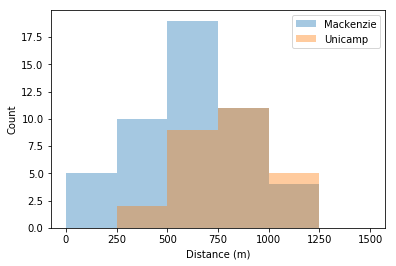

In [52]:
bins = [0,250,500,750,1000,1250,1500]

x = venues_mackenzie['distance']
plt.hist(x,bins,alpha=0.4,label='Mackenzie')

x = venues_unicamp['distance']
plt.hist(x,bins,alpha=0.4,label='Unicamp')


plt.legend()
plt.xticks(bins);
plt.xlabel('Distance (m)')
plt.ylabel('Count');

 - Unicamp: The biggest number of restaurants between 500 and 1000 m. No restaurants between 0 and 250 m.
 - Mackenzie: The biggest number of restaurants between 250 and 1000 m.

**Heatmap**

In [53]:
from folium import plugins
from folium.plugins import HeatMap

- *Unicamp*

In [54]:
map_unicamp = folium.Map(location=[latitude_u,longitude_u], zoom_start=14)
folium.TileLayer('cartodbpositron').add_to(map_unicamp) #cartodbpositron cartodbdark_matter

folium.Marker([latitude_u,longitude_u], popup='Unicamp',icon=folium.Icon(color='red')).add_to(map_unicamp)


# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lng']] for index, row in venues_unicamp.iterrows()]

HeatMap(heat_data).add_to(map_unicamp)

radius = [250,500,750,1000,1250]
center = [latitude_u,longitude_u]
for r in radius:
    folium.Circle(center, radius=r, fill=False, color='red').add_to(map_unicamp)
    


map_unicamp

- *Mackenzie*

In [55]:
map_mackenzie = folium.Map(location=[latitude_m,longitude_m], zoom_start=14)
folium.TileLayer('cartodbpositron').add_to(map_mackenzie) #cartodbpositron cartodbdark_matter
folium.Marker([latitude_m,longitude_m], popup='Mackenzie',icon=folium.Icon(color='red')).add_to(map_mackenzie)

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lng']] for index, row in venues_mackenzie.iterrows()]

HeatMap(heat_data).add_to(map_mackenzie)

radius = [250,500,750,1000,1250]
center = [latitude_m,longitude_m]
for r in radius:
    folium.Circle(center, radius=r, fill=False, color='red').add_to(map_mackenzie)
    


map_mackenzie

#### 3.2 Clustering

We want see how we can group the restaurants in each neighborhood. We decided use DBSCAN because, according the course, [Machine Learning with Python from Coursera](https://www.coursera.org/learn/machine-learning-with-python) it does no require specification of the number of clusters, it is robust to outliers and can find arbitrarily shaped clusters. 

We use only geographical coordinates, so it can help us to find areas with a low number of restaurants because it gives us the outliers, restaurants that were not associated with any cluster.

**Clustering algorithm : DBSCAN**

In [56]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Estimated number of clusters: 4
Estimated number of noise points: 6
Silhouette Coefficient: 0.436


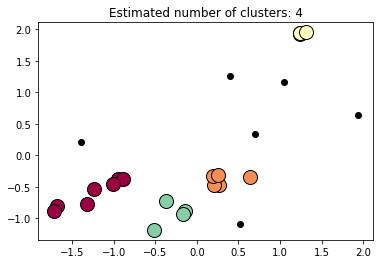

In [57]:
# #############################################################################
# data

X = venues_unicamp[['lat','lng']]
X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

##### map Clusters unicamp
<a name="clusterunicamp"></a>

In [58]:
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude_u, longitude_u], zoom_start=15)

folium.Marker([latitude_u,longitude_u], popup='Unicamp',icon=folium.Icon(color='red')).add_to(map_clusters)

# set color scheme for the clusters
kclusters = n_clusters_
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(venues_unicamp['lat'], venues_unicamp['lng'],labels ):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    if cluster != -1:
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    else:
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#000000',
        fill=True,
        fill_color='#000000',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Estimated number of clusters: 6
Estimated number of noise points: 7
Silhouette Coefficient: 0.380


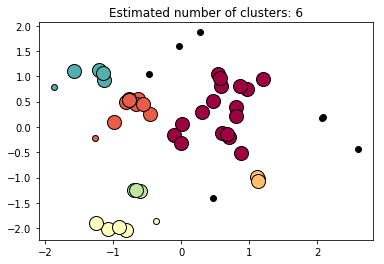

In [59]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data

X = venues_mackenzie[['lat','lng']]
X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [60]:
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude_m, longitude_m], zoom_start=15)

folium.Marker([latitude_m,longitude_m], popup='Mackenzie',icon=folium.Icon(color='red')).add_to(map_clusters)


# set color scheme for the clusters
kclusters = n_clusters_
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, cluster in zip(venues_mackenzie['lat'], venues_mackenzie['lng'],labels ):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    if cluster != -1:
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    else:
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#000000',
        fill=True,
        fill_color='#000000',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 4 Results

There are more restaurants near Mackenzie (50) than near Unicamp (27).

In both neighborhoods the most popular category is Food Truck. But the second most popular category near Unicamp is Snack Place and near Mackenzie is Bakery. Some categories appears different from the categories we include in request (Burger Joint, Bakery, Fast Food Restaurant, Food Stand, Food Truck, Hot Dog Joint, Pastelaria, Pizza Place, Sandwich Place, Snack Place), examples are Gas Station and Middle Eastern Restaurant. But there are Snack Places in some Gas Stations and the Middle Eastern Restauran that the request bring is a kind of Fast Food Restaurant.

The number of Burger Joints is surpring small. We have only one in Unicamp's neigborhood and two in Mackenzie's neigborhood. The percentage of Burger Joints is approximately 4 % in both neighborhood. These two informations shows it can be a good idea open a burger joint in these areas.

The density of restaurants near Mackenzie (8.67 restaurants/Km$^2$) is bigger than the density of restaurants near Unicamp (5.61 restaurants/Km$^2$).This result agree with the number of restaurants in each neighborhood. 

The difference between the mean distance from restaurants in Unicamp neighborhood to Unicamp and mean distance from restaurants in Mackenzie's neighborhood to Mackenzie is small relatively to distances. We have 798.67 m and 722.74 m respectively. But we have large standard deviations, 209.30 m and 279.27 m. 

Considering distances, other important information is the distribution of distances. In Unicamp's neighborhood the biggest number of restaurants are between 500 and 1000 m. There aren't restaurants in the interval 0 and 250 m. In Mackenzie's neighborhood the restaurants are conncentrated between 250 m and 1000 m. 

The heatmap shows that in Unicamp's neighborhood the restaurants are concentrated in two areas in the East of university. For Mackenzie we can see four areas, two near university at north and other two at East and West farther from university.

We also use a clustering algorithm DBSCAN. We want see how we can group the restaurants using geographical coordinates. For Unicamp we got 4 clusters and for Mackenzie 5 clusters. These results agree with heatmaps. We also note that this algorithm classifies some restaurants as outliers. We can see them in figures of section 3.2 as black points. They are in areas with a low density of restaurants.

The numerical results points Unicamp as the best neighborhood.

### 5. Discussion

It is important say that the size of two universities in our analysis is very different. Mackenzie is located in one block and Unicamp is huge, it has [3.5 Km$^2$](https://pt.wikipedia.org/wiki/Universidade_Estadual_de_Campinas).  
We can see in [map](#unicamp)  that there are many restaurants inside this university.

We don't have information about the number of students but we can conclude Unicamp has more students because it is much bigger.

Unicamp is located at North of Campinas and Mackenzies is near the downtown area. Maybe in Mackenzie's neighborhood there are  customer beyond students. It can influence the amount of customers during weekends, holidays and vacations.

Maybe it is important search for high schools, and other business  in this neighborhoods.

Take into account 
the number of restaurants in each neighborhood,
the number of burger joints in each neighborhood,
the percentage of burger joints and
the density of restaurants in each neighborhood we conclude Unicamp's neighborhood is the best area to open a burger joint.

Looking at the [Unicamp's map](#clusterunicamp) we can see that
inside Unicamp there are some areas without restaurants and the business would be near students but the young needs to obtain special permissions before start made hamburgers. Outside he needs to obtains permissions too but it is easier.
We can also see that at East of university there are no streets. 

Looking at the [Unicamp's map](#clusterunicamp) we can see that
inside Unicamp there are some areas without restaurants and two clusters, at the East side there aren't streets and we have two cluster of restaurants outside university.

Inside business would be near students but the young needs to obtain special permissions before start made hamburgers. Outside he needs to obtains permissions too but it is easier.

After decide outside is the best. We indicate the following address: Rua Roxo Moreira, between streets Rua Doutor Jose Anderson and Avenida Doutor Romeu Tortima. It is near Unicamp and far from clusters of restaurants.

### 6. Conclusion

The objective of this project was to help a young man find a place to start his business. Starting with two universities provided by him, we use data from foursquare api to find the location of other restaurants that sell food that is very much consumed by students. We did an exploratory data analysis and used the dbscan algorithm and managed to indicate a possible place for the young man to open his burger joint. More detailed studies on the type of food sold by food trucks may be necessary